# PL3: PRIMEROS PASOS EN QISKIT

Comenzamos instalando las librerías necesarias. En el momento de creación de este notebook, las versiones actuales son:


*   Qiskit: 1.2.4
*   Qiskit IBM Runtime: 0.30.0
*   Qiskit Aer: 0.15.1
*   Pylatexenc: 2.10



In [3]:
# !pip install qiskit
# !pip install qiskit-ibm-runtime
# !pip install qiskit_aer
# !pip install pylatexenc

Creamos nuestro primer circuito: tendrá un qubit, una puerta H y una medición.

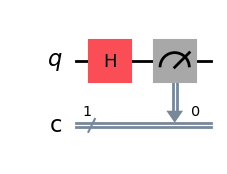

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

Utilizamos un simulador para ejecutar el circuito. Utilizamos 10 shots (ejecuciones) y una semilla (1234) para que los resultados sean reproducibles.

In [7]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator


sampler = Sampler(AerSimulator(seed_simulator = 1234))
job = sampler.run([qc], shots = 10)
results = job.result()
d = results[0].data.c # Acceso a los valores de las mediciones
print("Número de ejercuciones:", d.num_shots)
print("Estadísticas de las ejecuciones:", d.get_counts())
print("Resultados de las medidas:", d.array)
print("Resultados de las medidas como cadenas de texto:", d.get_bitstrings())

Número de ejercuciones: 10
Estadísticas de las ejecuciones: {'1': 7, '0': 3}
Resultados de las medidas: [[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
Resultados de las medidas como cadenas de texto: ['1', '0', '1', '1', '1', '0', '1', '1', '0', '1']


Ahora, vamos a calcular de forma exacta las amplitudes del vector de estado final. Esto solo se puede hacer un simulador, no en un ordenador cuántico real.

Es necesario eliminar las mediciones finales y usar la función *Statevector*.

In [ ]:
qc.remove_final_measurements()
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)
print("Amplitudes del vector de estado:", statevector)

Amplitudes del vector de estado: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Ahora, vamos a calcular la matriz del circuito. De nuevo, esto solo se puede hacer en un simulador. Usaremos la función *Operator*.

In [ ]:
from qiskit.quantum_info import Operator
result = Operator(qc).data
print("Matriz del circuito:", result)

Matriz del circuito: [[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


## EJERCICIOS

1.- Crea y ejecuta un circuito que aplique una puerta *X* y una medición. Ejecútalo 10 veces. ¿Qué resultados salen? ¿Por qué?





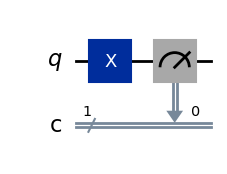

In [ ]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

qc.draw("mpl")

In [ ]:
sampler = Sampler(AerSimulator(seed_simulator = 1234))
job = sampler.run([qc], shots = 10)
results = job.result()
d = results[0].data.c # Acceso a los valores de las mediciones
print("Número de ejercuciones:", d.num_shots)
print("Estadísticas de las ejecuciones:", d.get_counts())
print("Resultados de las medidas:", d.array)
print("Resultados de las medidas como cadenas de texto:", d.get_bitstrings())

Número de ejercuciones: 10
Estadísticas de las ejecuciones: {'1': 10}
Resultados de las medidas: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
Resultados de las medidas como cadenas de texto: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


2.- Crea y ejecuta un circuito que aplique una puerta *Z* y una medición. Ejecútalo 10 veces. ¿Qué resultados salen? ¿Por qué?





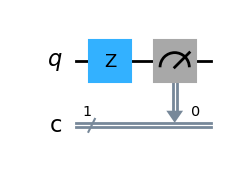

In [ ]:
qc = QuantumCircuit(1, 1)
qc.z(0)
qc.measure(0, 0)

qc.draw("mpl")

In [ ]:
sampler = Sampler(AerSimulator(seed_simulator = 1234))
job = sampler.run([qc], shots = 10)
results = job.result()
d = results[0].data.c # Acceso a los valores de las mediciones
print("Número de ejercuciones:", d.num_shots)
print("Estadísticas de las ejecuciones:", d.get_counts())
print("Resultados de las medidas:", d.array)
print("Resultados de las medidas como cadenas de texto:", d.get_bitstrings())

Número de ejercuciones: 10
Estadísticas de las ejecuciones: {'0': 10}
Resultados de las medidas: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Resultados de las medidas como cadenas de texto: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


3.- Crea y ejecuta un circuito que aplique una puerta *X*,  luego una puerta *Z* y, finalmente, una medición. Ejecútalo 10 veces. ¿Qué resultados salen? ¿Por qué?

Obtén el vector de estado. ¿Es coherente con los resultados de medición que has obtenido?

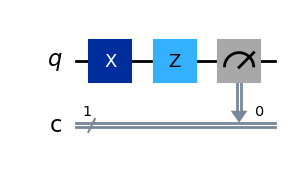

In [ ]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.z(0)
qc.measure(0, 0)

qc.draw("mpl")

In [ ]:
sampler = Sampler(AerSimulator(seed_simulator = 1234))
job = sampler.run([qc], shots = 10)
results = job.result()
d = results[0].data.c # Acceso a los valores de las mediciones
print("Número de ejercuciones:", d.num_shots)
print("Estadísticas de las ejecuciones:", d.get_counts())
print("Resultados de las medidas:", d.array)
print("Resultados de las medidas como cadenas de texto:", d.get_bitstrings())

Número de ejercuciones: 10
Estadísticas de las ejecuciones: {'1': 10}
Resultados de las medidas: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
Resultados de las medidas como cadenas de texto: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


4.- Usando *Operator*, comprueba las siguientes equivalencias de puertas:


*   $X^2 = I$ `<- Aquí había una errata`
*   $HZH = X$
*   $S^4 = I$
*   $T^8 = I$



In [ ]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.x(0)
qc.measure(0, 0)

qc.draw("mpl")

qc.remove_final_measurements()
result = Operator(qc).data
print("Matriz del circuito:", result)

Matriz del circuito: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [ ]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

qc.remove_final_measurements()
result = Operator(qc).data
print("Matriz del circuito:", result)

Matriz del circuito: [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [ ]:
qc = QuantumCircuit(1, 1)
for _ in range(4):
    qc.s(0)
qc.measure(0, 0)

qc.draw("mpl")

qc.remove_final_measurements()
result = Operator(qc).data
print("Matriz del circuito:", result)

Matriz del circuito: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [ ]:
qc = QuantumCircuit(1, 1)
for _ in range(8):
    qc.t(0)
qc.measure(0, 0)

qc.draw("mpl")

qc.remove_final_measurements()
result = Operator(qc).data
print("Matriz del circuito:", result)

Matriz del circuito: [[1.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 1.+8.90187929e-18j]]


## BONUS: EJECUCIÓN EN UN ORDENADOR CUÁNTICO REAL

Para ejecutar en un ordenador cuántico real, necesitamos acceder a los servicios de IBM Quantum. Debes copiar tu token de https://quantum.ibm.com/ y pegarlo dentro de las comillas de la asignación de la variable *mytoken*.

In [ ]:
mytoken = ""

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService(channel="ibm_quantum", token=mytoken)

AccountNotFoundError: 'Unable to find account.'

Ahora, necesitamos hacer dos cosas más:

* Seleccionar un ordenador cuántico. Elegiremos el menos ocupado con el método *least_busy*.
* Transpilar el circuito para poder ejecutarlo en el ordenador que hemos elegido

In [ ]:
backend = service.least_busy(simulator=False, operational=True)
print("El ordenador seleccionado ha sido:", backend)

qc2 = QuantumCircuit(1,1)
qc2.h(0)
qc2.measure(0,0)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc2)

isa_circuit.draw('mpl', idle_wires=False)

Ahora, ya podemos ejecutarlo como hacíamos en el simulador.

In [ ]:
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots = 10)
results = job.result()
d = results[0].data.c # Acceso a los valores de las mediciones
print("Número de ejercuciones:", d.num_shots)
print("Estadísticas de las ejecuciones:", d.get_counts())
print("Resultados de las medidas:", d.array)
print("Resultados de las medidas como cadenas de texto:", d.get_bitstrings())